# OCR

In [124]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

from paddleocr import PaddleOCR
from translate import Translator

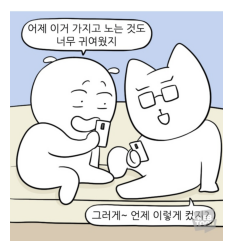

In [125]:
image_path = '../../data/image/webtoon.jpeg'
image = Image.open(image_path)

plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.axis('off')
plt.show()

In [126]:
# https://www.paddleocr.ai/latest/version3.x/algorithm/PP-OCRv5/PP-OCRv5_multi_languages.html#_1
ocr = PaddleOCR(
    lang='korean', # 따로 설정 안하면 중국어만 탐지
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

results = ocr.predict(image_path)
result = results[0]
result

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('korean_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\korean_PP-OCRv5_mobile_rec`.


{'input_path': '../../data/image/webtoon.jpeg',
 'page_index': None,
 'doc_preprocessor_res': {'input_path': None,
  'page_index': None,
  'input_img': array([[[253, ..., 254],
          ...,
          [253, ..., 254]],
  
         ...,
  
         [[178, ..., 216],
          ...,
          [178, ..., 216]]], shape=(750, 690, 3), dtype=uint8),
  'model_settings': {'use_doc_orientation_classify': False,
   'use_doc_unwarping': False},
  'angle': -1,
  'rot_img': array([[[253, ..., 254],
          ...,
          [253, ..., 254]],
  
         ...,
  
         [[178, ..., 216],
          ...,
          [178, ..., 216]]], shape=(750, 690, 3), dtype=uint8),
  'output_img': array([[[253, ..., 254],
          ...,
          [253, ..., 254]],
  
         ...,
  
         [[178, ..., 216],
          ...,
          [178, ..., 216]]], shape=(750, 690, 3), dtype=uint8)},
 'dt_polys': [array([[50, 35],
         ...,
         [50, 84]], shape=(4, 2), dtype=int16),
  array([[144,  76],
         ...,
 

In [127]:
result.keys()

dict_keys(['input_path', 'page_index', 'doc_preprocessor_res', 'dt_polys', 'model_settings', 'text_det_params', 'text_type', 'text_rec_score_thresh', 'return_word_box', 'rec_texts', 'rec_scores', 'rec_polys', 'vis_fonts', 'textline_orientation_angles', 'rec_boxes'])

In [128]:
result['rec_texts'] # 중국어가 기본이라 따로 설정을 안하면 ['', '', '']만 나옴

['어제 이거 가지고 노는 것도', '너무 귀여웠지', '그러게~언제 이렇게 컸지']

In [129]:
result['rec_boxes']

array([[ 50, ...,  84],
       ...,
       [260, ..., 691]], shape=(3, 4), dtype=int16)

## 이미지의 text 교체

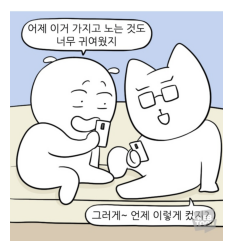

In [130]:
image_path = '../../data/image/webtoon.jpeg'
image = Image.open(image_path)

plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.axis('off')
plt.show()

In [131]:
image_new = image.copy()
draw = ImageDraw.Draw(image_new)
draw

In [132]:
# x1, y1, x2, y2 - 좌측상단 / 우측하단
result['rec_boxes'][0].tolist()  

[50, 35, 444, 84]

In [133]:
# 이미지 박스화 및 지우기
for x1, y1, x2, y2 in result['rec_boxes']:
    print(x1, y1, x2, y2)
    draw.rectangle([x1, y1, x2, y2], outline='red', fill='white')

50 35 444 84
144 76 350 124
260 640 660 691


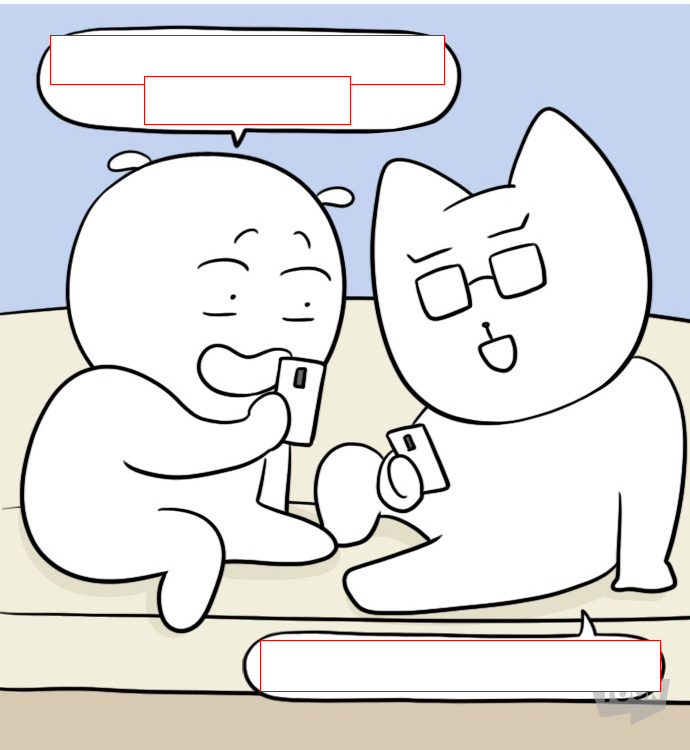

In [134]:
image_new

In [135]:
# 텍스트 쓸 준비
font_path = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(font_path, 16)

In [136]:
my_text_list = [" 오늘 점심은?", "설마??", "그럼ㅎㅎ"]

In [137]:
for idx, (x1, y1, x2, y2) in enumerate(result["rec_boxes"]):
    print(x1, y1, x2, y2)
    draw.rectangle([x1, y1, x2, y2], outline="white", fill="white")
    draw.text([x1, y1, x2, y2], my_text_list[idx], font=font, fill="black")

50 35 444 84
144 76 350 124
260 640 660 691


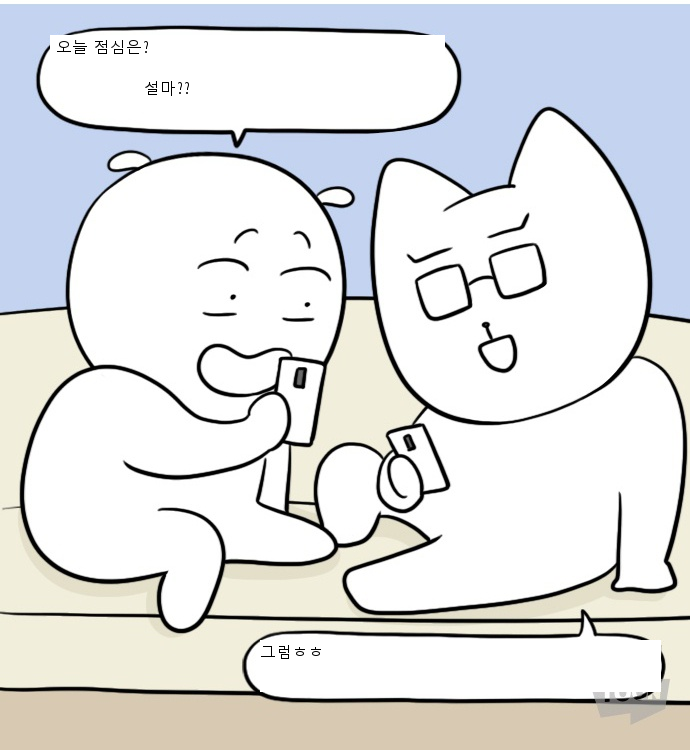

In [138]:
image_new

# 텍스트 번역하여 변경하기

In [139]:
# deepl : API KEY 사용하는 방식이 더 정확하고 빠름
translator = Translator(from_lang="ko", to_lang="en")

document_result = []

for sent in result['rec_texts']:
    print(sent)
    translation = translator.translate(sent)
    print(translation)

    document_result.append(translation)

document_result

어제 이거 가지고 노는 것도
Playing with this yesterday
너무 귀여웠지
It was so cute
그러게~언제 이렇게 컸지
Yeah ~ When did I grow up like this?


['Playing with this yesterday',
 'It was so cute',
 'Yeah ~ When did I grow up like this?']

In [140]:
for idx, (x1, y1, x2, y2) in enumerate(result["rec_boxes"]):
    print(x1, y1, x2, y2)
    draw.rectangle([x1, y1, x2, y2], outline="white", fill="white")
    draw.text([x1, y1, x2, y2], document_result[idx], font=font, fill="black")

50 35 444 84
144 76 350 124
260 640 660 691


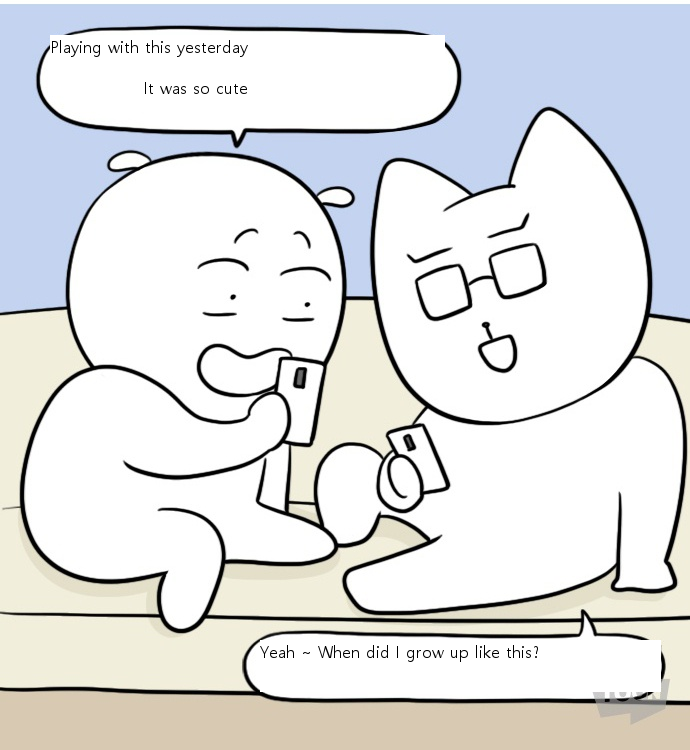

In [141]:
image_new